# Initialize Libraries

In [1]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt

# Important functions

In [2]:
# Sigmoid and sigmoid prime function

def sigmoid(x):
    return (1/(1+np.exp(-x)))

def sigmoidprime(x):
    return (sigmoid(x) * (1 - sigmoid(x)))

#we need this to calculate the accuracy
def correct_label(outcome,label):
    if ((label == 0 and outcome <0.5) or (label == 1 and outcome >=0.5)):
        return 1
    else:
        return 0
      

# Perceptron Class

In [3]:
class Perceptron:
    """These are the Neurons of the Neuronal Network. Variables:
    
    input units = numer of connections to Perceprons in layer before
    
    weights = weights of the connections to Perceptons of prev. Layer
    
    bias = bias of this Percepron
    
    alpha = learning rate 
    
    drive = weihghts * activation of last Layer + Bias
    
    activation = sigmoid of drive 
    
    actication_prev_layer = activation of the prvious layer-store to calculate the backpropagation
    """    
    
    def __init__(self, input_units): 
       
        self.input_units = input_units
        self.weights = np.random.randn(input_units)    # create array wtih length of number of imput with random values
        self.bias = np.random.randn()                  # bias gets a random start value
        self.alpha = 1                                 # learning rate
        self.drive = 0 
        self.activation = 0                            # sigmoid of self.drive
        self.activation_prev_layer = np.empty(input_units)
        

    def forward(self, input_activation): 
        """ forward:
        
        called in MLP
        
        receives the activation of the previous Layer
        returns the activation of this Percepton
        """
        self.activation_prev_layer = input_activation   # store acticativation  of prev_layer
        self.drive = np.dot(input_activation,self.weights) + self.bias  #calculate the drice cy building dot product of activation times weight
        self.activation = sigmoid(self.drive)           # calculate the activation of this Percepton by applining
        return self.activation
    
    
    def update(self, delta): # delta is the error function
        """update:
        
        called in MLP
        
        - receives delta/error function 
        - updates the weights and biases
        - weight_old = alpha* delta * activation of previous layer
        """
        
        self.weights -= self.alpha * delta * self.activation_prev_layer
        self.bias -= self.alpha * delta 
        
       
    def get_drive(self):
        return self.drive
    
    def get_weights(self):
        return self.weights
        
        

# Multilayer Perceptron (MLP)

In [4]:
# just for one hidden layer-> works
class MLP():
    """Class: MLP
    
    - called in training
    
    size_hidden_Layer = ammount of Perceptrons per Layer
    input_units = ammount of input values from "the first Layer"
    
    - has one hiddden Layer 
    - creates Perceptrons in hidden and output layer 
    """
    
    def __init__(self, input_units, size_hidden_layer = 4):
        self.size_hidden_layer = size_hidden_layer
        
        #store hidden Layer Perceprtons in array
        self.hidden_layer = np.array( [Perceptron(input_units) for i in range(size_hidden_layer)], dtype=object)
        self.output_layer = Perceptron(size_hidden_layer) 
        
        
        
    def forward_step(self, input_activation):
        """forward_step
        
        - called in training
        
        - receives input_activation/ training data
        - calls forward on every percepron in hidden layer and stores activation in array
        - calls forward on output layer with array of activation of hidden layer
        - return output of output perceptron
        """
        
        outputs = np.empty(self.size_hidden_layer)        
        for i in range(self.size_hidden_layer):
            outputs[i] = self.hidden_layer[i].forward(input_activation)
        return self.output_layer.forward(outputs)        
        
        
        
    def backprop_step(self, derivate_loss):
        """backprop_step:
        
        - called in training
        
        - receives the derivate of the_loss for one training point.
        - calculates delta for each Perceptron  
        - update each Perceptron
        """
        
        
        delta_ol = derivate_loss * sigmoidprime(self.output_layer.get_drive())# activation/ loss       
        self.output_layer.update(delta_ol)
        
        derivative_weights = delta_ol * self.output_layer.get_weights()
        
        for i in range(self.size_hidden_layer):
            delta_hl = derivative_weights[i] * sigmoidprime(self.hidden_layer[i].get_drive())        
            self.hidden_layer[i].update(delta_hl)


# Training Process

In [5]:
#Training data
possible_input = np.array(([1,1],[1,0],[0,1],[0,0]))

target_and = np.array([1,0,0,0])
target_or = np.array([1,1,1,0])
target_nand = np.array([0,1,1,1])
target_nor = np.array([0,0,0,1])
target_xor = np.array([0,1,1,0])

#training
mlp = MLP(2,4)
amount_training_epoch = 1000
target = target_and


arr_loss = np.zeros(amount_training_epoch)
arr_accuracy = np.zeros(amount_training_epoch)

for epoch in range(amount_training_epoch):
    
    accuracy_epoch = 0 #how accurate the calculation is in this wpoch
    loss_epoch = 0
    for i in range(len(possible_input)):#randomization->einfügen
    
        #forward step
        prediction = mlp.forward_step(possible_input[i]) # outcome of our mlp

        #backward step
        derivate_loss = -2*(target[i]-prediction)
        mlp.backprop_step(derivate_loss)
    
        # accuracy and loss is calculated and summed up
        
        accuracy_epoch += correct_label(prediction,target[i]) # add 1 if correct and 0 if not
        loss_epoch += pow((target[i] - prediction),2) # squart error between outcome and actual label
 
    #put loss and accuracy of each epoch in array
    arr_accuracy[epoch] = accuracy_epoch/len(possible_input)
    arr_loss[epoch] = loss_epoch/len(possible_input)

# Visualization

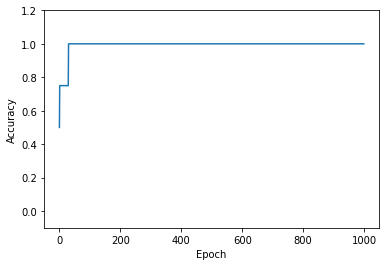

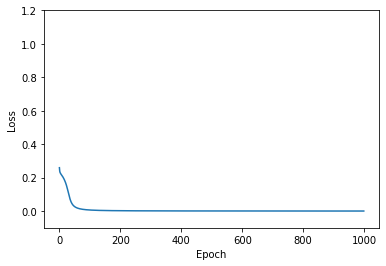

In [6]:
#Visulalisation of accuracy
plt.figure()
plt.plot(range(amount_training_epoch),arr_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

#Visulalisation of loss
plt.figure()
plt.plot(range(amount_training_epoch),arr_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()